In [1]:
import numpy as np
import pylab as plt
import math

# オイラー法を用いて非等温反応式を解く

---

r=kCaCb  
k=k0exp(-E/RT)  

熱が変化することで反応速度は連続的に変化するので解析的に解けない  
物質収支と熱収支を連立することで反応率と温度の時間変化を算出する

---

まず
dx/dt=k/(x+c)  
を解いてみる

## オイラー法の計算過程を関数として定義する
---
今回は反応率x_end*100 [%]になった時点で終了とする

In [48]:
def eular_cal(x,x_end,t,step):
    #微分方程式
    #func=k/c/(x+1)
    #パラメーターの入力
    k=2
    c=10
    
    #出力用の配列を用意
    t_array=np.array([t])
    x_array=np.array([x])
    
    #計算回数
    n=0
    
    while(x<x_end):
        func=k/c/(x+1)
        
        t=t+step
        x=x+func*step
        
        x_array=np.append(x_array,[x])
        t_array=np.append(t_array,[t])
        
        n+=1
    
    return n,t_array,x_array

In [90]:
#パラメーターを入力する

x=0
x_end=0.99
t=0

step=0.1

cal_data=eular_cal(x,x_end,t,step)

#計算回数を表示する
print(cal_data[0])

74


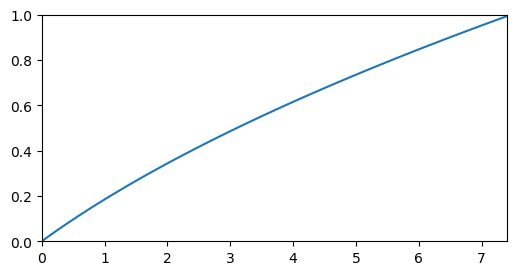

In [88]:
t_change=cal_data[1]
x_change=cal_data[2]

plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_change),0,1])
plt.plot(t_change, x_change)
plt.show()

## 解析解と比較してみる

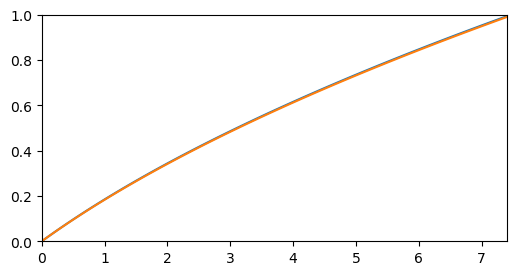

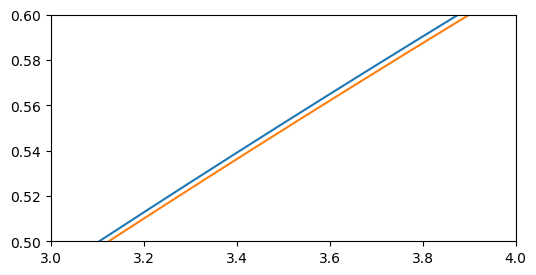

In [92]:
t_change=cal_data[1]
x_change=cal_data[2]

t_theo=np.linspace(0,10,100)
x_theo=[math.sqrt(1+2/5*t_theo[i])-1 for i in range(100)]

plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_change),0,1])
plt.plot(t_change, x_change)
plt.plot(t_theo, x_theo)

plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([3,4,0.5,0.6])
plt.plot(t_change, x_change)
plt.plot(t_theo, x_theo)
plt.show()

上の方程式ではstep=0.1 s程度で十分に安定した数値計算となることがわかる。

---
# <font color="Red"> 実際の問題 </font>
---


A→Cで表される液相反応を非等温の回分反応器を用いて行う。すなわち、内径D=0.8 m、高さ1.3 mの撹拌僧にAのみからなる原料を500 ㎏仕込んで、槽の側面と底部をジャケットでつつみ、その中に熱媒体を流して、槽外壁を常に613 Kに保って反応させる。反応率が95%になる反応時間を求めよ。本反応は1次反応であって、反応速度は次式で与えられる。  
  
-r<sub>a</sub>=3.228×10^13×exp(-E/RT)×Ca  
  
ただし、E=186.2×10^3 J/mol  
反応熱 ΔH=62760 J/mol  
反応液密度 ρ=900 ㎏/m^3  
反応液の平均比熱容量 Cp=2.51×10^3 J/kg/K  
Aの分子量 M=385×10^-3 kg/mol  
総括伝熱係数 U=523 W/m^2/K  
  
培風館『反応工学』 p170 例題7・4

In [66]:
#パラメーターを入れよう
#原料
W_a=500 #kg
ro_a=900 #kg/m3
D=0.8 #m
T_wall=613 #K
#頻度因子
ko=3.228*10**13 #1/s
E=186.2*10**3 #J
H_reaction=-62760 #J/mol
cpm_ave=2.51*10**3 #J/kg/K
M_a=0.385 #kg/mol
thermo_diff=532 #J/s/m2/K

#気体定数
R=8.314

In [67]:
#BR(batch reacter)高さ
height=W_a/ro_a*4/math.pi/D**2 #m
#伝熱面積
A_diff=math.pi*D*height+math.pi*D*D/4 #m2
#初濃度
C_a0=ro_a/M_a #mol/m3

print(height, A_diff, C_a0)

1.105242660360384 3.2804326023521435 2337.6623376623374


In [82]:
#微分方程式
#設計方程式
#func_mat
#熱収支
#func_heat

#初期温度と反応率
Temp=613 #K
x=0
t=0

#停止条件
x_end=0.95

#ステップ
step=0.1

#出力用の配列を用意
t_array=np.array([t])
x_array=np.array([x])
Temp_array=np.array([Temp])

#計算回数
n=0

while(x<x_end):
    func_mat=ko*math.exp(-E/R/Temp)*(1-x)
    func_heat=(T_wall-Temp)*A_diff*thermo_diff/cpm_ave/W_a\
                +H_reaction/cpm_ave/ro_a*ko*math.exp(-E/R/Temp)*C_a0*(1-x)

    t+=step
    x+=func_mat*step
    Temp=Temp+func_heat*step

    x_array=np.append(x_array,[x])
    t_array=np.append(t_array,[t])
    Temp_array=np.append(Temp_array,[Temp])

    n+=1

print(n)

19988


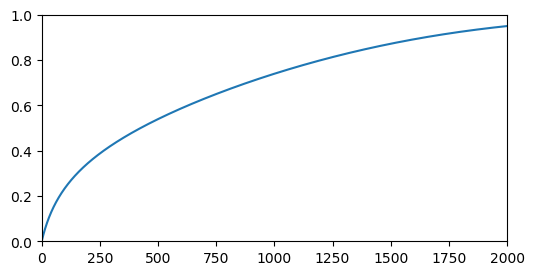

In [83]:
plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_array),0,1])
plt.plot(t_array, x_array)
plt.show()

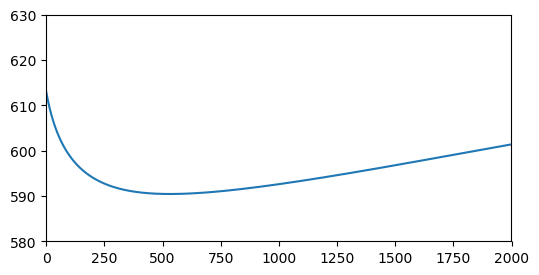

In [86]:
plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_array),580,630])
plt.plot(t_array, Temp_array)
plt.show()

---
大抵何かのパラメータを間違えてうまくいかないことが多い

---